<a href="https://colab.research.google.com/github/obeabi/Stats/blob/main/MatchedPairDesign_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let’s work through matching control units to a set of treatment units. For the new product introduction experiment let’s say that your manager has assigned a set of 10 treatment stores in California where the Grape flavor of the product will be sold.

The data for all the stores is in the file: NewProductControlData.csv

The data for the treatment stores for the Grape test is: GrapeProductTreatmentStores.csv

What are the control stores for each treatment store?

Your result should be a dataset with two fields: treatment store and control store. There are 10 treatment stores, and you're matching two control stores to each, so there should be twenty rows in your dataset. See the next section for the results.
Supporting Materials
Grape Product Treatment Stores
New Product Control Stores

In [3]:
# Optimization with PuLP
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas as  pd
import numpy as np
import scipy
from pulp import *
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

print("Libraries installed!")

Libraries installed!


In [129]:
# Upload teatment file as dataframe
#df_treat =pd.read_csv('grapeproducttreatmentstores.csv')
 
df = pd.read_csv('newproductcontroldata.csv')
df.head()

,Store ID,City,State,Zip Code,Category Sales,Product Count,Size
0,1,ALABASTER,AL,35007,18.88,1,Large
1,2,BIRMINGHAM,AL,35209,44125.66,6,Large
2,3,DECATUR,AL,35601,46627.92,5,Large
3,4,HUNTSVILLE,AL,35806,26658.48,6,Large
4,5,MOBILE,AL,36606,1863.60,3,Large


In [130]:
# shape of dataframe
df.shape

(7008, 7)

In [131]:
# Inspect data types
df.dtypes

Store ID            int64
City               object
State              object
Zip Code            int64
Category Sales    float64
Product Count       int64
Size               object
dtype: object

In [132]:
# Missing values
df.isnull().sum()

Store ID          0
City              0
State             0
Zip Code          0
Category Sales    0
Product Count     0
Size              0
dtype: int64

In [146]:
# Inspect store id 111
treatment_store = df[df['Store ID']== 111]
treatment_store

,Store ID,City,State,Zip Code,Category Sales,Product Count,Size
110,111,Irvine,CA,92618,9556.14,5,Large


In [147]:
# Filter out CA stores
df1 = df[df.loc[:, 'State'] == 'CA'].reset_index(drop = True)
df1.State.value_counts()

CA    913
Name: State, dtype: int64

In [149]:
# Inspect dataset
df1.head()

,Store ID,City,State,Zip Code,Category Sales,Product Count,Size
0,104,Bakersfield,CA,93311,666.18,5,Large
1,105,Canoga Park,CA,91303,868.80,3,Large
2,106,Colma,CA,94014,11682.08,5,Large
3,107,Costa Mesa,CA,92626,58509.72,5,Large
4,108,Dublin,CA,94568,4601.87,4,Large


In [155]:
column_names = df1['Store ID'].tolist()
column_names[0:8]

['104', '105', '106', '107', '108', '109', '110', '111']

In [153]:
# Inspect store id 111
treatment_store = df1[df1['Store ID']== 111]
treatment_store

,Store ID,City,State,Zip Code,Category Sales,Product Count,Size
7,111,Irvine,CA,92618,9556.14,5,Large


In [156]:
# Filter for stores in CA

df1[['Store ID', 'Zip Code'] ]=df1[['Store ID', 'Zip Code']].astype(str)

num_cols = []
for names in df1.columns:
  if df1[names].dtype != 'object':
    num_cols.append(names)
    
num_cols 

['Category Sales', 'Product Count']

In [157]:
# Create feature matrix
X = df1[num_cols].values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx[0:5]

array([[0.00084025, 0.57142857],
       [0.00109718, 0.28571429],
       [0.01480897, 0.57142857],
       [0.07418878, 0.57142857],
       [0.0058309 , 0.42857143]])

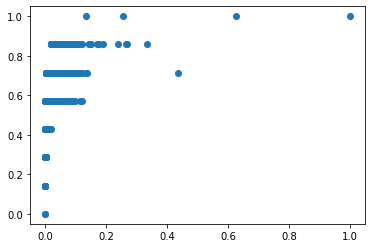

In [143]:
# Visualize dataset
plt.scatter(feature_mtx[:,0], feature_mtx[:,1])
plt.show()

In [144]:
# Clustering using scipy
import scipy
leng = feature_mtx.shape[0]

D =np.zeros([leng, leng])

for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean( feature_mtx[i], feature_mtx[j])


array([1.12729182e-02, 2.85926573e-01, 2.69579926e-03, 6.20756112e-02,
       1.42995210e-01, 7.02847419e-03, 6.39013757e-03, 0.00000000e+00,
       1.43122010e-01, 2.85965729e-01, 1.43337955e-01, 1.16261970e-02,
       2.85875261e-01, 2.85957875e-01, 2.85960810e-01, 1.43321656e-01,
       1.42966210e-01, 1.73211893e-02, 2.85970022e-01, 1.43314201e-01,
       1.01224920e-02, 1.43021393e-01, 1.52579209e-01, 1.43048875e-01,
       1.43524658e-01, 2.85870007e-01, 1.42949209e-01, 1.43895611e-01,
       9.55738533e-03, 1.42941443e-01, 1.42887376e-01, 9.71806000e-03,
       5.31054474e-03, 2.17995632e-03, 1.43486469e-01, 1.44405599e-01,
       2.71868250e-02, 1.47753499e-01, 4.28732348e-01, 3.86016127e-03,
       7.25508749e-03, 1.55671212e-01, 1.43326242e-01, 2.91639309e-01,
       2.38543123e-03, 1.43169290e-01, 1.43001556e-01, 1.43046613e-01,
       2.81722778e-03, 2.85955214e-01, 2.85937883e-01, 1.42867579e-01,
       1.43243640e-01, 4.96998442e-03, 4.28738587e-01, 5.98986729e-02,
      

In [184]:
# convert numpy array to dataframe
df = pd.DataFrame(D[7,:], index = column_names,columns= ["score"])
df.reset_index(drop = False, inplace= True)
# Rename column name
df.rename(columns = {'index':'Store ID'}, inplace = True)
#print("\nPandas DataFrame: ")
df.head()

,Store ID,score
0,104,0.011273
1,105,0.285927
2,106,0.002696
3,107,0.062076
4,108,0.142995


In [183]:
print("Second lowest value of each column is:")
result = df.sort_values( by = ['score'])

print("The store id closest to store id 111 is :")
print(result.iloc[1,0])

Second lowest value of each column is:
The store id closest to store id 111 is :
5035


## Data set 2

In [4]:
# Upload control file as dataframe
#df_con =pd.read_csv('newproductcontroldata.csv')
#df_treat =pd.read_csv('grapeproducttreatmentstores.csv')

df_con.head()

,Store ID,City,State,Zip Code,Category Sales,Product Count,Size
0,1,ALABASTER,AL,35007,18.88,1,Large
1,2,BIRMINGHAM,AL,35209,44125.66,6,Large
2,3,DECATUR,AL,35601,46627.92,5,Large
3,4,HUNTSVILLE,AL,35806,26658.48,6,Large
4,5,MOBILE,AL,36606,1863.60,3,Large


In [35]:
df_con.shape

(7008, 7)

In [39]:
df_con.iloc[332,:]

Store ID                333
City              Hawthorne
State                    CA
Zip Code              90250
Category Sales       465.14
Product Count             4
Size                  Large
Name: 332, dtype: object